## About

Working with energy efficiency dataset related to residential buildings. Based on publication ['Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools'](https://scholar.google.com/scholar?hl=en&q=A.+Tsanas%2C+A.+Xifara%3A+%27Accurate+quantitative+estimation+of+energy+performance+of+residential+buildings+using+statistical+machine+learning+tools%27%2C+Energy+and+Buildings%2C+Vol.+49%2C+pp.+560-567%2C+2012&btnG=&as_sdt=1%2C5&as_sdtp=) by A. Tsanas and A. Xifara published in Energy and Buildings, Vol. 49, pp. 560-567, 2012.

### Links

* [Energy efficiency Data Set ](https://archive.ics.uci.edu/ml/datasets/Energy+efficiencys)


### Description of Dataset

#### Data Set Information

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


#### Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses. 

Specifically: 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
* X4	Roof Area 
* X5	Overall Height 
* X6	Orientation 
* X7	Glazing Area 
* X8	Glazing Area Distribution 
* y1	Heating Load 
* y2	Cooling Load



### Loading Data

The first step is always a data loading. Before loading data was converted from original Excel file into CSV.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

dataset = pd.read_csv('data/ENB2012-data-uci.csv', sep=';')
columns = ['X1 Relative Compactness',
           'X2 Surface Area',
           'X3 Wall Area',
           'X4 Roof Area',
           'X5 Overall Height',
           'X6 Orientation',
           'X7 Glazing Area',
           'X8 Glazing Area Distribution',
           'y1 Heating Load',
           'y2 Cooling Load']

mapping = {'X1' : columns[0], 
           'X2' : columns[1],
           'X3' : columns[2],
           'X4' : columns[3],
           'X5' : columns[4],
           'X6' : columns[5],
           'X7' : columns[6],
           'X8' : columns[7],
           'Y1' : columns[8],
           'Y2' : columns[9]}

mapping = collections.OrderedDict(sorted(mapping.items()))
target_columns = [mapping[x] for x in mapping if x[0] != 'Y']
#print (target_columns)

dataset.columns = columns
dataset.head(5)

,X1 Relative Compactness,X2 Surface Area,X3 Wall Area,X4 Roof Area,X5 Overall Height,X6 Orientation,X7 Glazing Area,X8 Glazing Area Distribution,y1 Heating Load,y2 Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


### Data Description

In [2]:
dataset.describe()

,X1 Relative Compactness,X2 Surface Area,X3 Wall Area,X4 Roof Area,X5 Overall Height,X6 Orientation,X7 Glazing Area,X8 Glazing Area Distribution,y1 Heating Load,y2 Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000969D438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000096DB828>]], dtype=object)

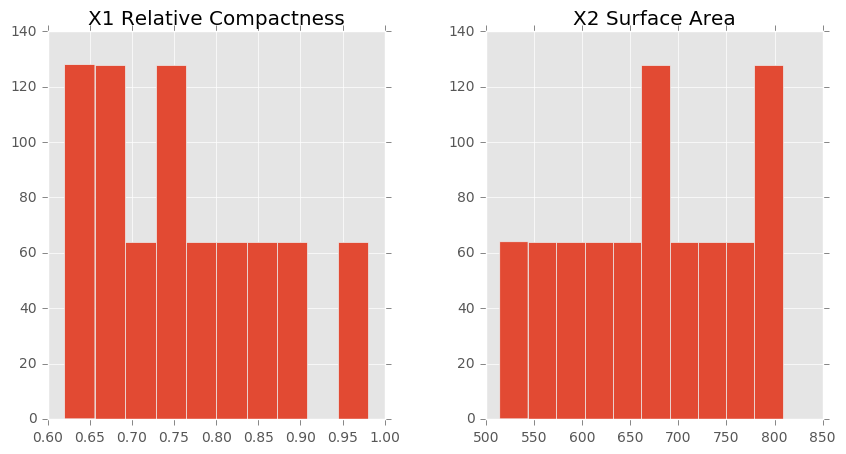

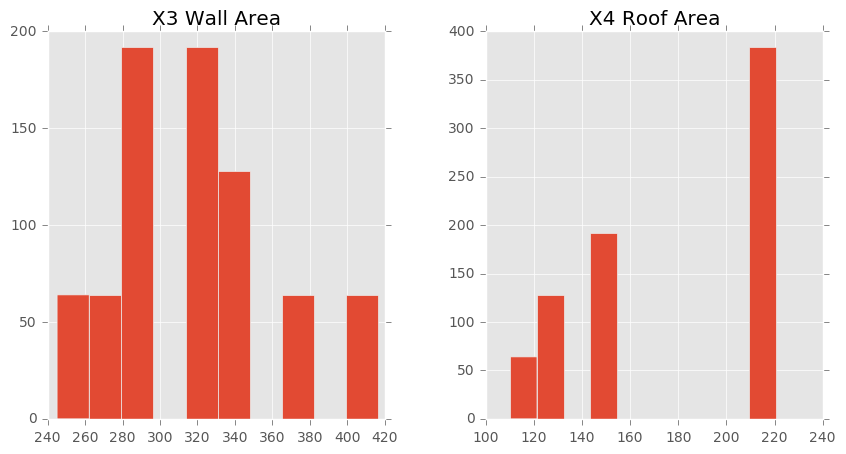

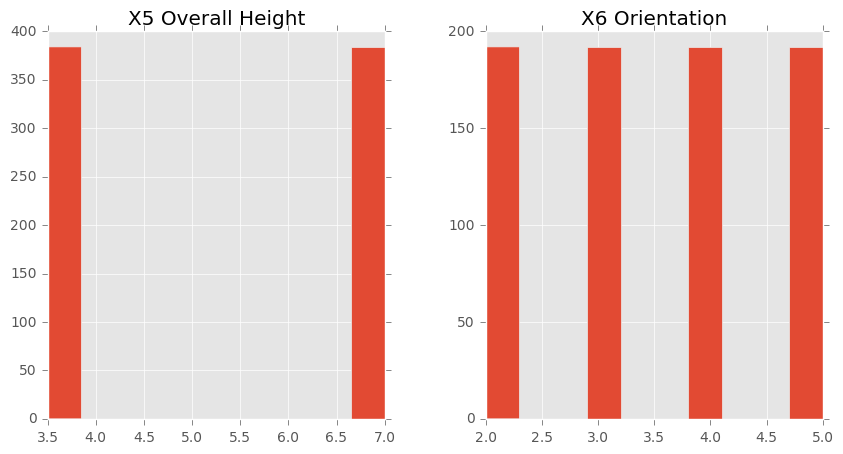

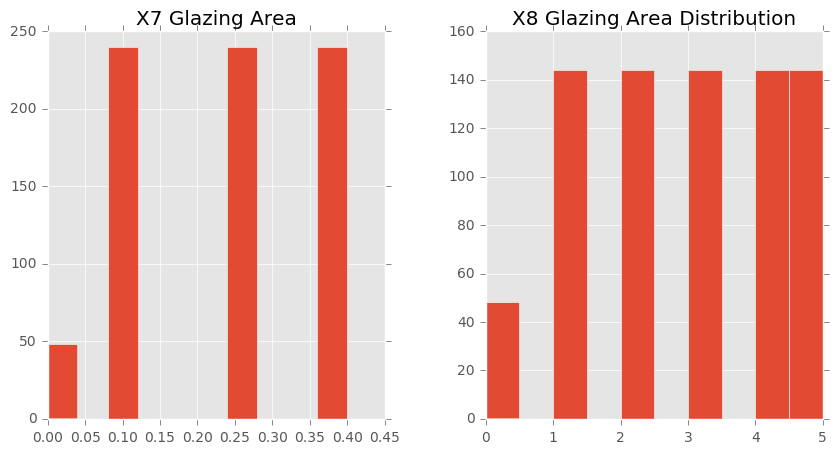

In [3]:
dataset[[mapping["X1"], mapping["X2"]]].hist(bins=10, figsize = (10,5))
dataset[[mapping["X3"], mapping["X4"]]].hist(bins=10, figsize = (10,5))
dataset[[mapping["X5"], mapping["X6"]]].hist(bins=10, figsize = (10,5))
dataset[[mapping["X7"], mapping["X8"]]].hist(bins=10, figsize = (10,5))

In [4]:
# try all styles
# for style in plt.style.available:
#     plt.style.use(style)
#     print (style)
#     dataset[[mapping["X1"], mapping["X2"]]].hist(bins=10, figsize = (10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000162C92E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000015D00FD0>]], dtype=object)

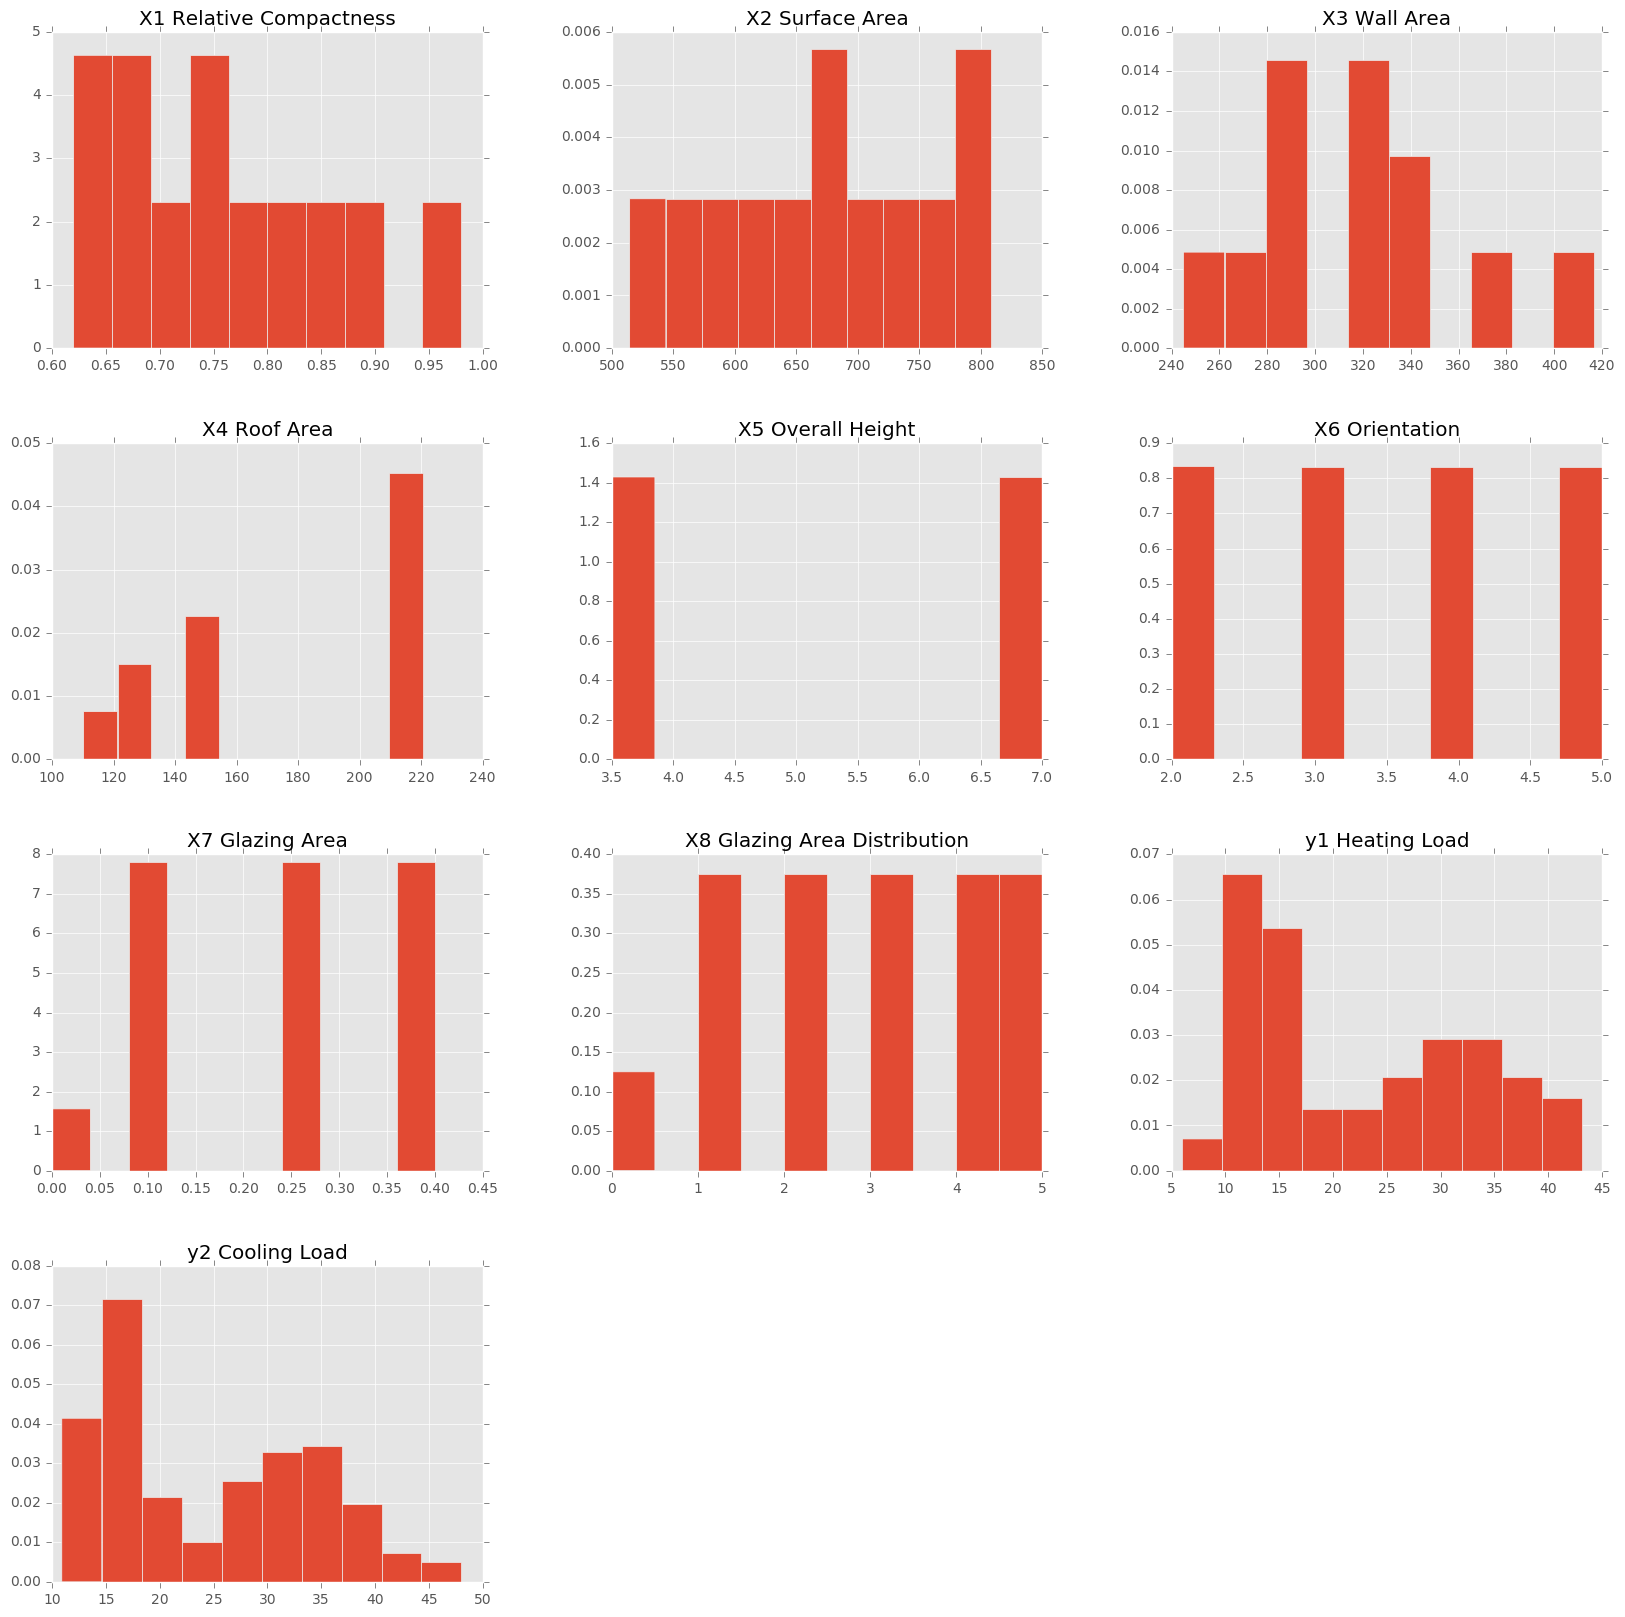

In [26]:
# different view of histograms
#dataset[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]].hist(bins=10, figsize = (10,10) , normed=1)
dataset.hist(bins=10, figsize = (20,20), normed=1)

Plotting target/output variables in form of histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B23AE80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009999F28>]], dtype=object)

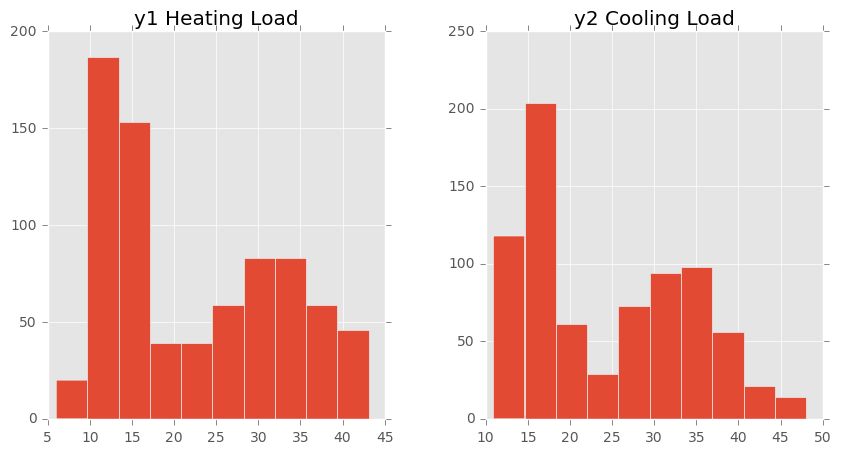

In [6]:
dataset[[mapping["Y1"], mapping["Y2"]]].hist(bins=10, figsize = (10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000099B25C0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009641F60>]], dtype=object)

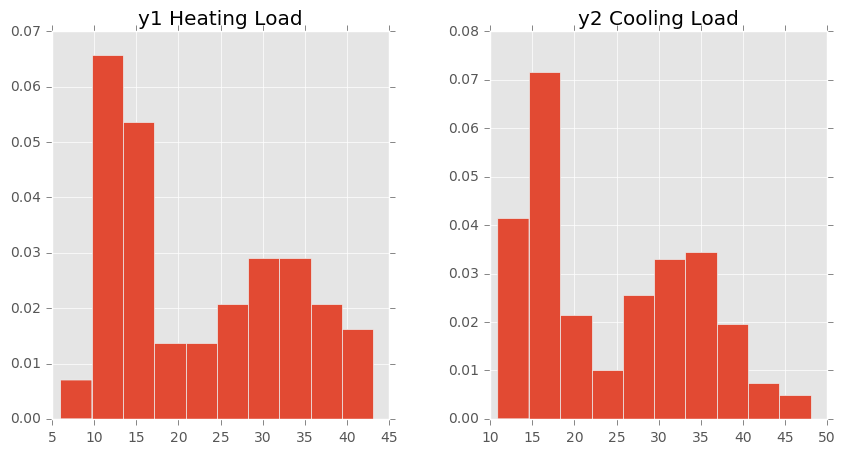

In [7]:
# normalized
dataset[[mapping["Y1"], mapping["Y2"]]].hist(bins=10, figsize = (10,5), normed=1)

### Data Preprocessing

#### Normalizing Data in Dataset - Multiple Approaches

In [8]:
def normalize_sklearn(dataset):
    """normalization of an input dataset"""
    from sklearn import preprocessing
    x = dataset.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_norm = pd.DataFrame(x_scaled)
    return df_norm

def normalize_manually(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

df_norm_v1 = normalize_sklearn(dataset)
df_norm_v2 = normalize_manually(dataset)
df_norm = df_norm_v2

In [9]:
df_norm_v1.head(5)
#df_norm_v1.tail(15)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085


In [10]:
df_norm_v2.head(5)
#df_norm_v2.tail(15)

,X1 Relative Compactness,X2 Surface Area,X3 Wall Area,X4 Roof Area,X5 Overall Height,X6 Orientation,X7 Glazing Area,X8 Glazing Area Distribution,y1 Heating Load,y2 Cooling Load
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085


#### Comparing Normalization Approaches

Replacing all values that are smaller then particular epsilon (my own choice) with zeros and counting total amount of zeros in each collumn.

In [11]:
#from pandas.util.testing import assert_frame_equal
#assert_frame_equal(df_norm, df_norm_v2)

def compare_normalization_approaches(df_norm_v1, df_norm_v2):
    """Replacing all values that are smaller then particular epsilon (my own choice) 
       with zeros and counting total amount of zeros in each collumn.
    """
    EPSILON = 0.000000000000001
    comparison_array = df_norm_v1.values - df_norm_v2.values
    comparison_array[comparison_array < EPSILON] = 0
    print ('Total number of zeros in earch row (in each should be 768)')
    print ((comparison_array == 0).astype(int).sum(axis=0))
    
compare_normalization_approaches(df_norm_v1, df_norm_v2)

Total number of zeros in earch row (in each should be 768)
[768 768 768 768 768 768 768 768 768 768]


In [12]:
# df_norm_v1.hist(bins=10, figsize = (15,15))

### Boxplot

Making plots with boxplot.

In [13]:
def plot_multiple_boxplots():
    
    for key in mapping:
        if key[0] != 'Y':
            dataset[[mapping[key]]].plot.box(figsize = (5,5))
            
# plot_multiple_boxplots()

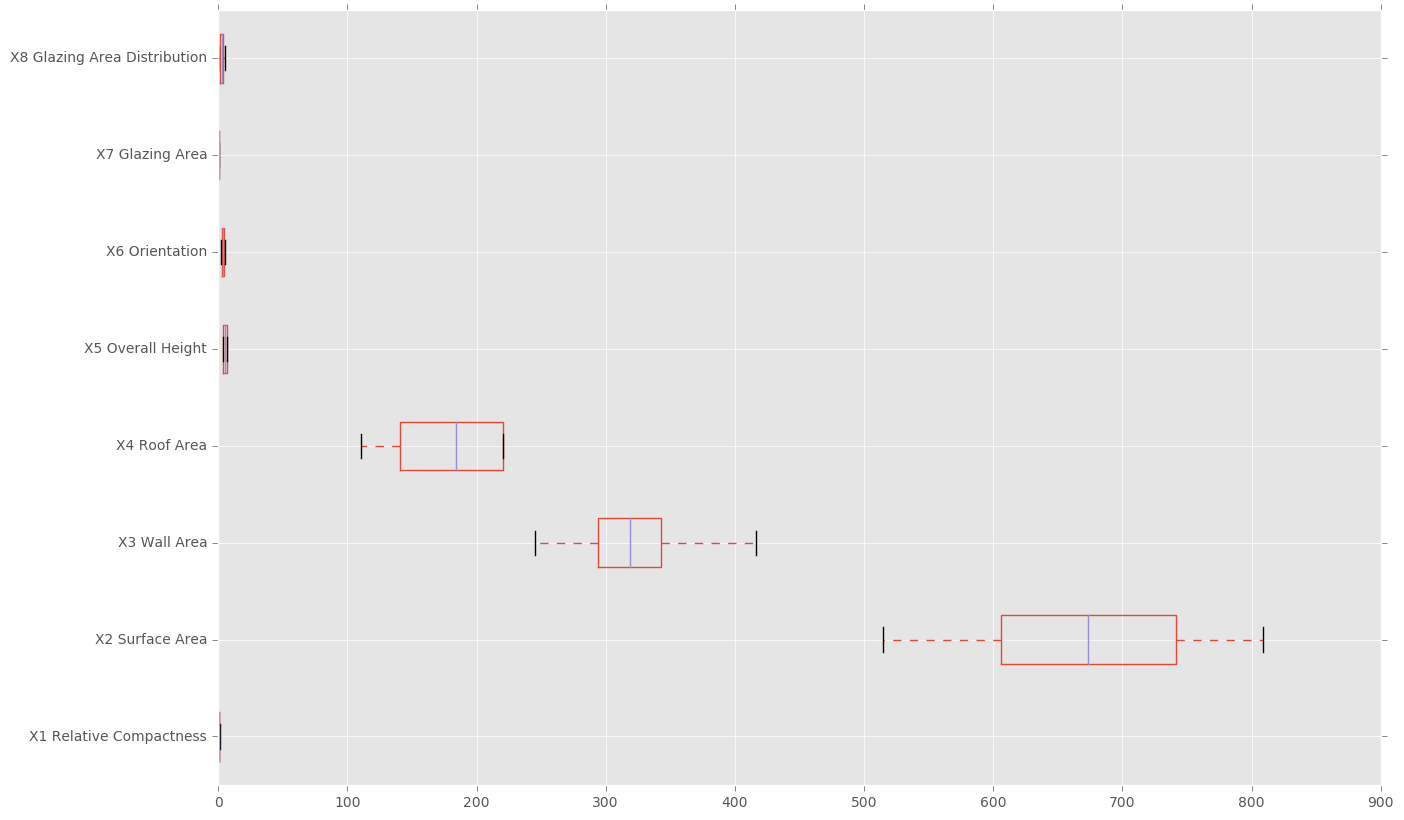

In [14]:
dataset[target_columns].plot.box(figsize = (15,10), vert=False)

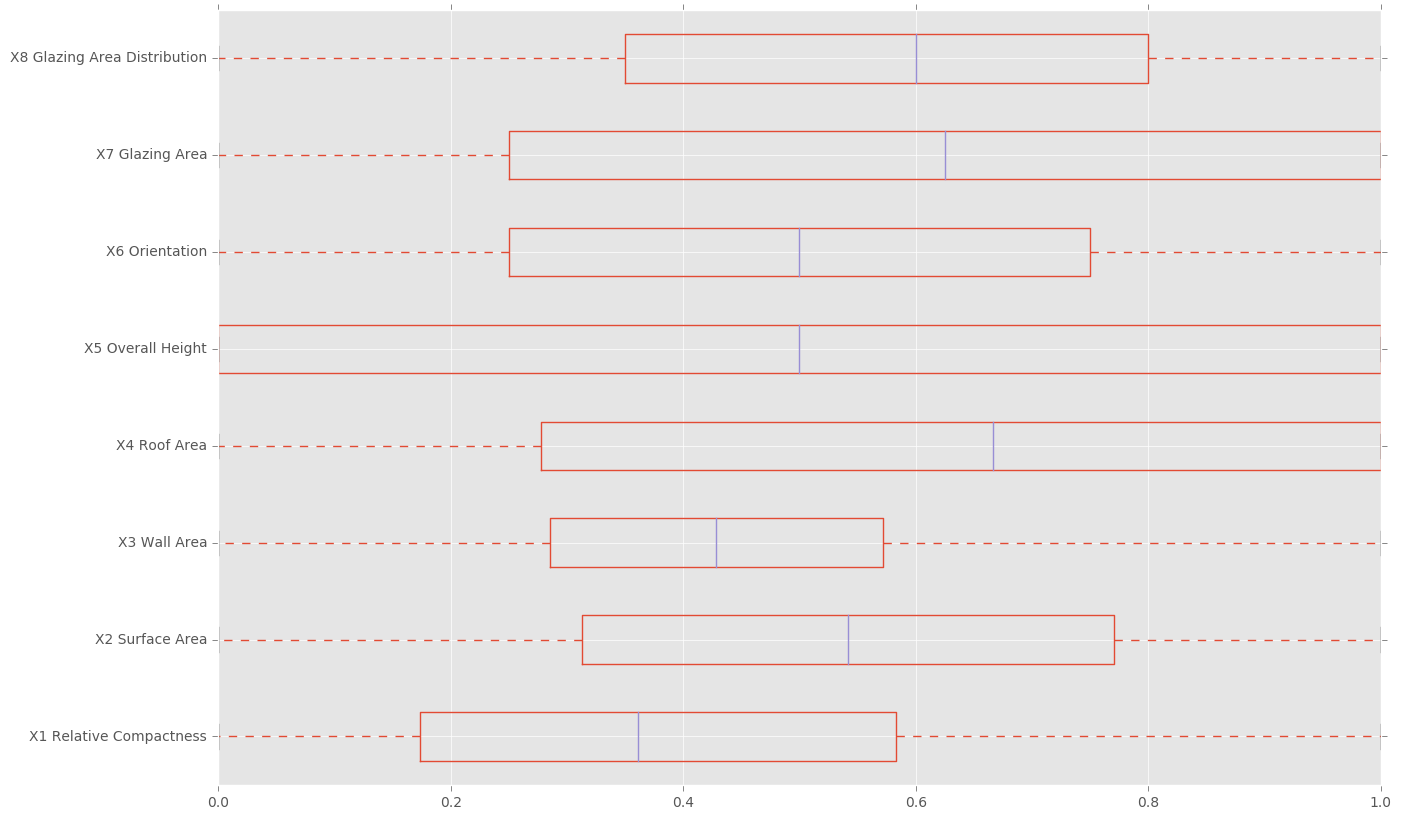

In [15]:
df_norm[target_columns].plot.box(figsize = (15,10), vert=False)

#### Scatter Plot

Making scatter plot that compares normalized values of input with normalized values of output.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CA114A8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F4147F0>]], dtype=object)

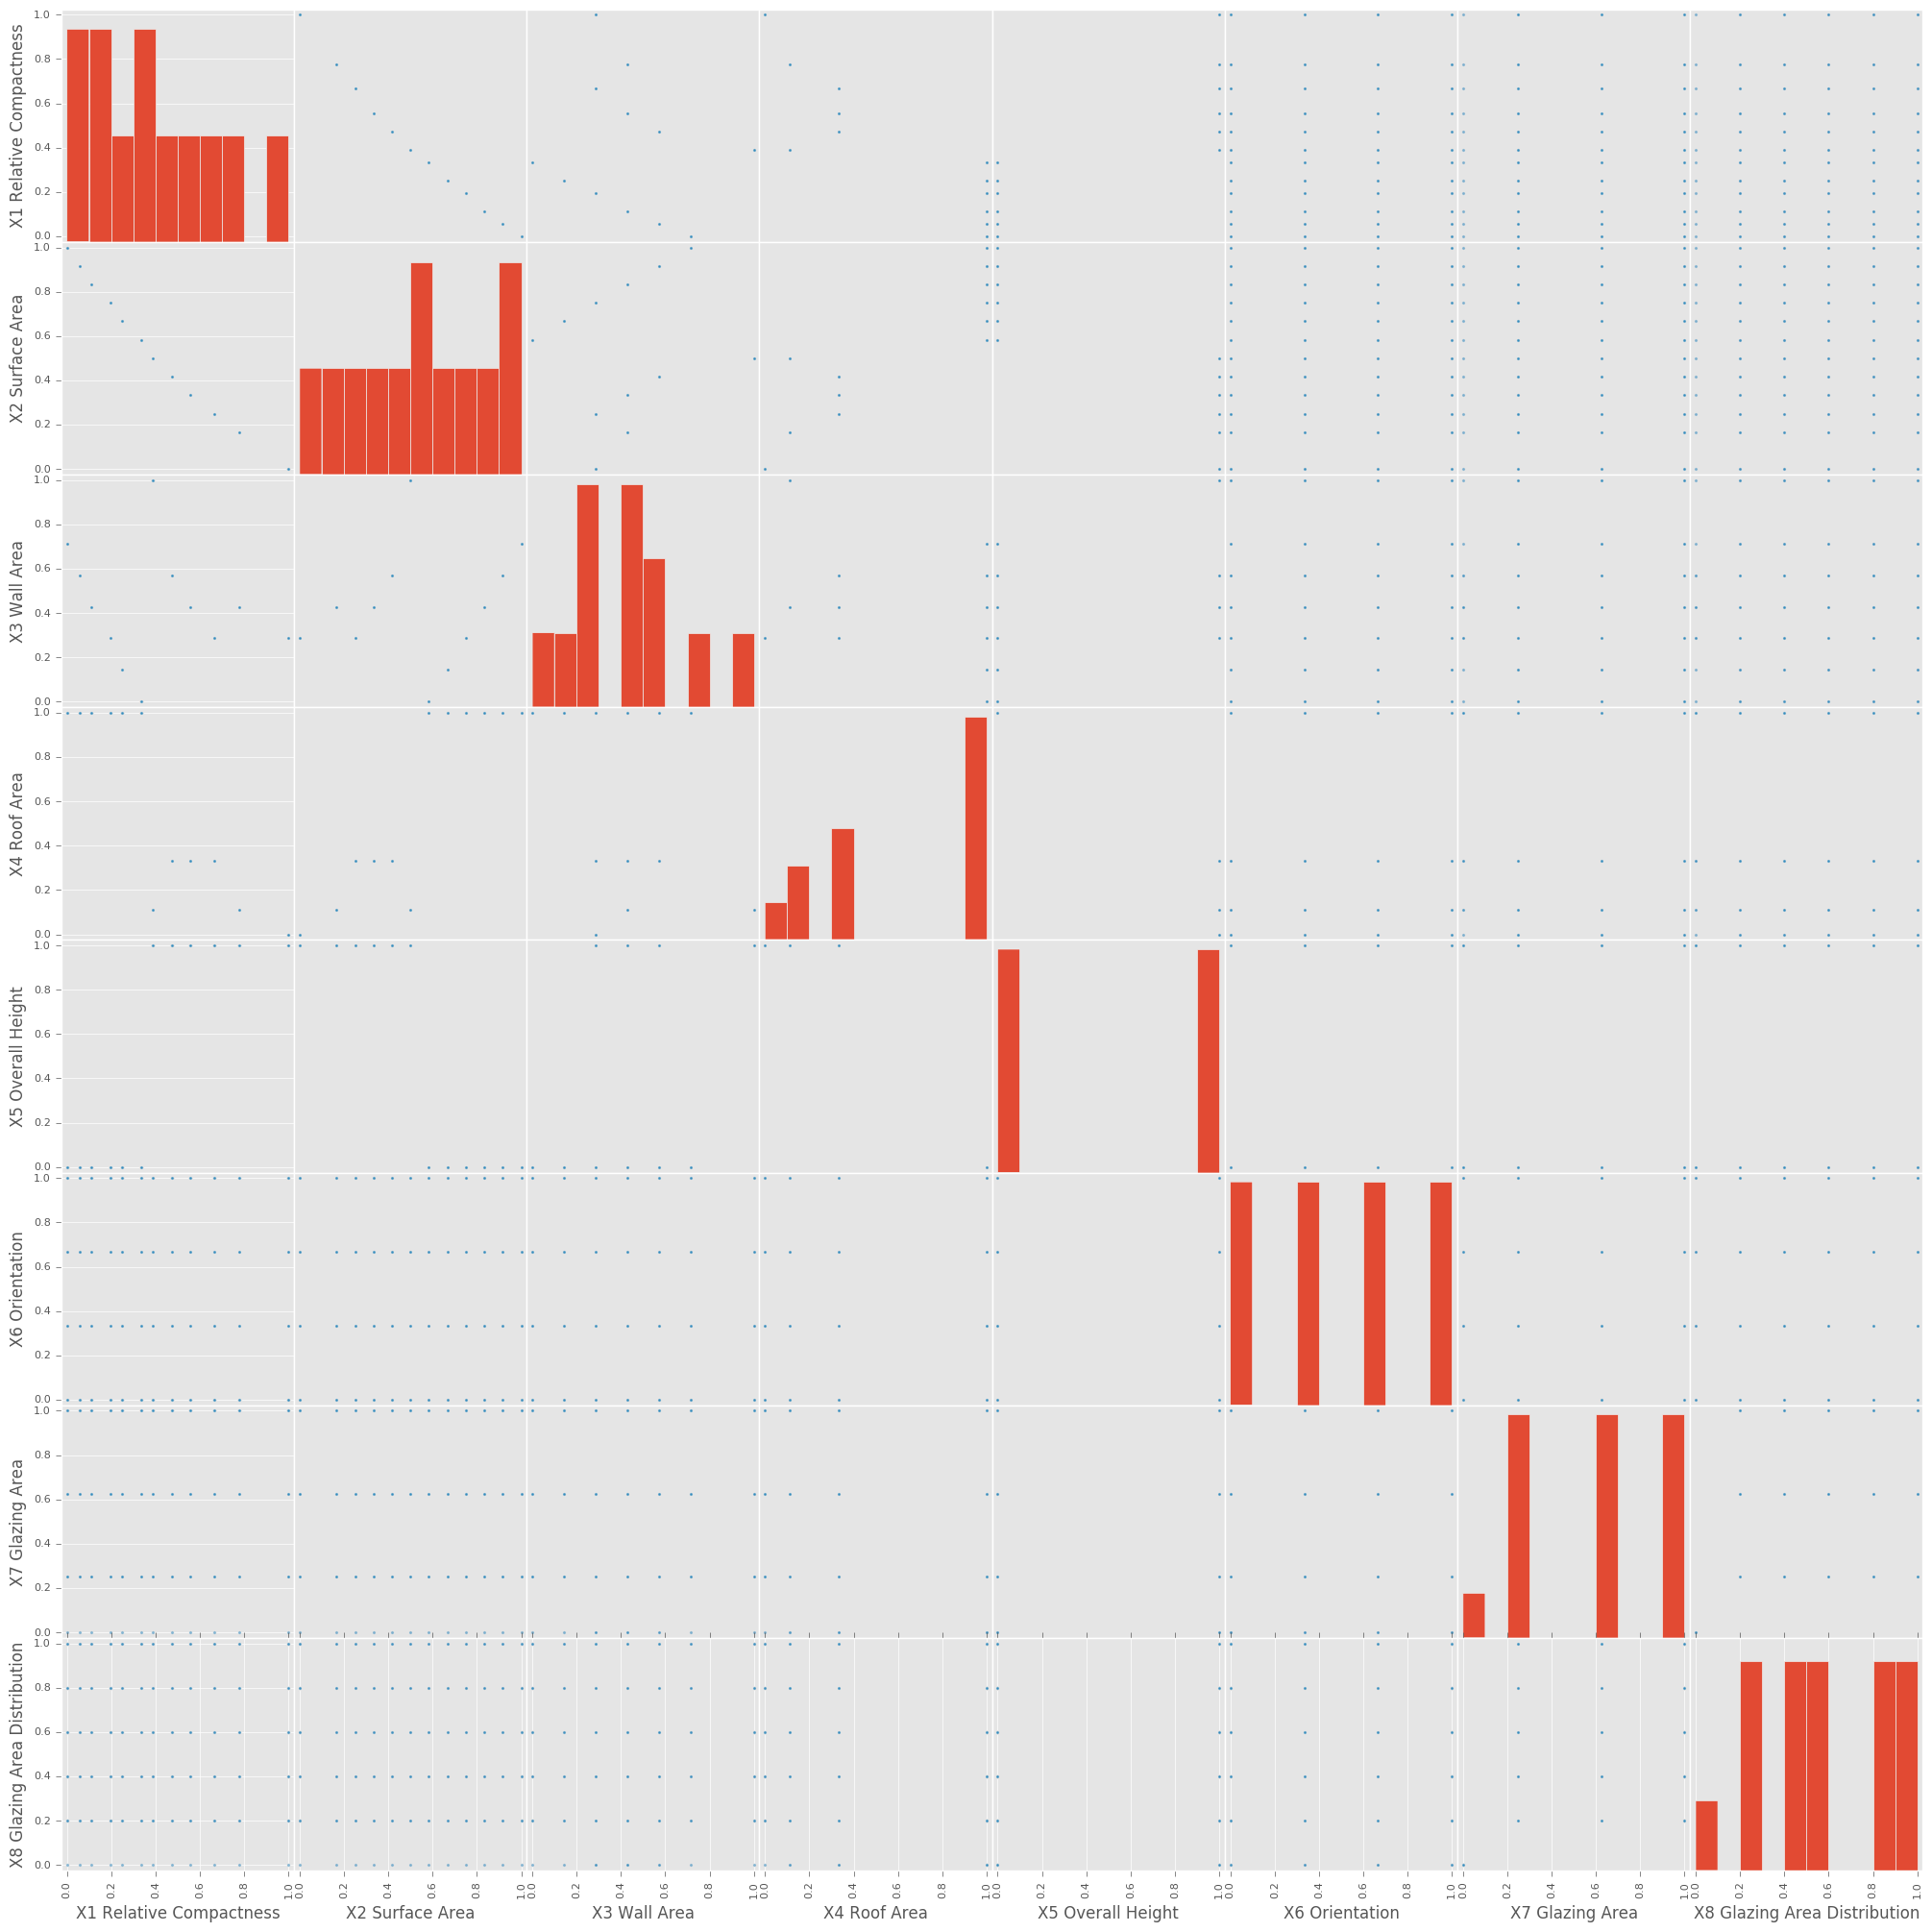

In [16]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df_norm[target_columns], alpha=0.2, figsize=(25, 25))

In [17]:
def plot_scatter(df, target_output):
    """ Making scatter plot for input/output comparison """
    
    if target_output not in ('Y1', 'Y2'):
        print ('Wrong target output variable for plotting')
        return None
    
    for key in mapping:
        if key[0] != 'Y':
            df.plot.scatter(x=mapping[key], y=mapping[target_output], figsize = (3,3))

#plot_scatter(df_norm, 'Y1') 
#plot_scatter(df_norm, 'Y2')

Comparing all input values with output **'y1 Heating Load'** and **'y2 Cooling Load'**

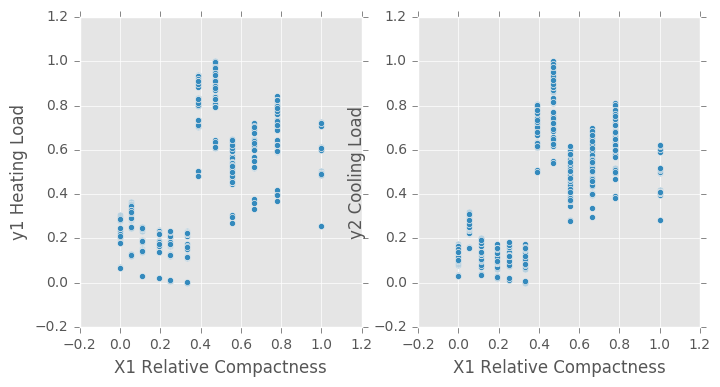

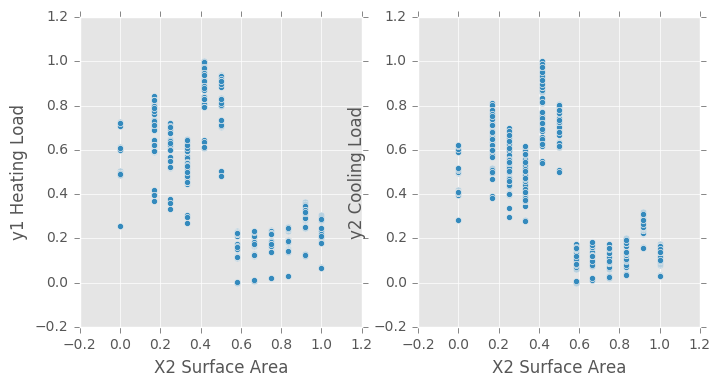

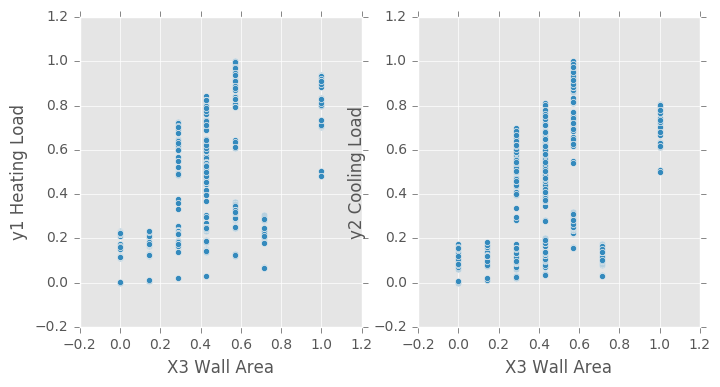

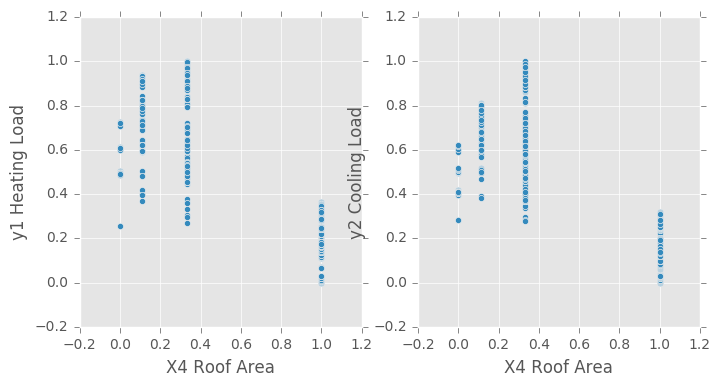

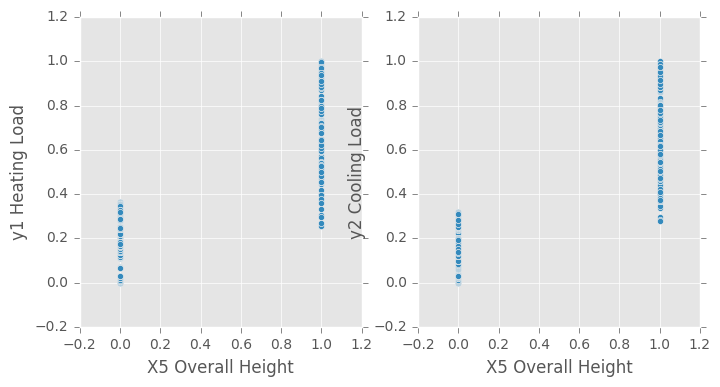

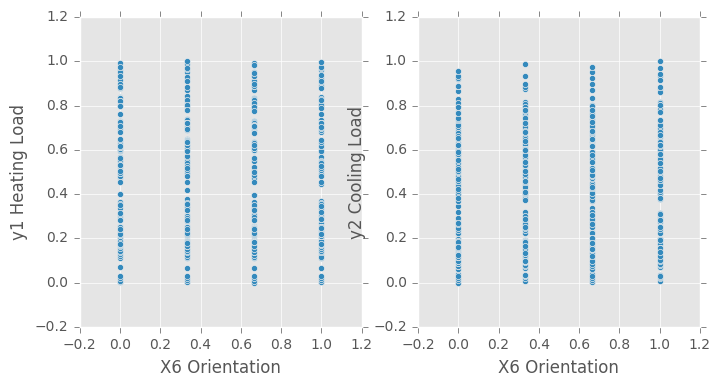

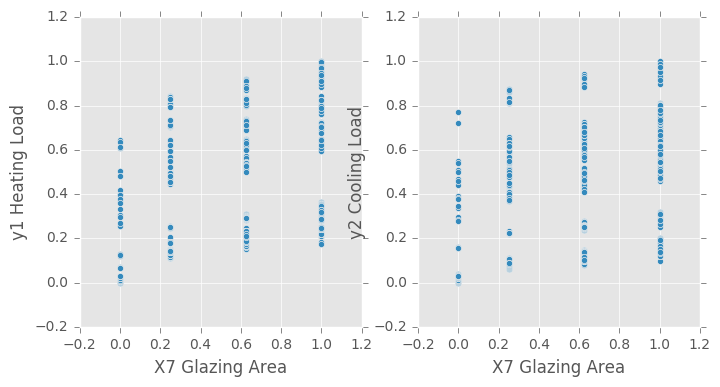

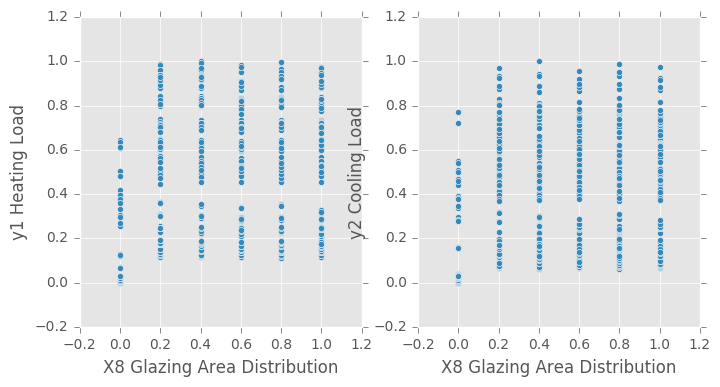

In [27]:
for key in mapping:
    
    if key[0] != 'Y':
        fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize = (8,4))
        df_norm.plot.scatter(x=mapping[key], y=mapping["Y1"], ax=ax1, grid=True)
        df_norm.plot.scatter(x=mapping[key], y=mapping["Y2"], ax=ax2, grid=True)

### Correlations

After plotting data in form of scatter and histogram, it's make sense to prove correlation between input variables and output onces.

In [19]:
print ('{feature}\t\t\t\t{correlation_with_Y1}\t{correlation_with_Y2}'.format(feature='Key', 
                                                                       correlation_with_Y1='correlation_with_Y1', 
                                                                       correlation_with_Y2='cor_spearman_y2'))
for key in mapping:
    if key[0] != 'Y':
        cor_spearman_y1 = df_norm[mapping[key]].corr(df_norm[mapping["Y1"]], method='spearman')
        cor_spearman_y2 = df_norm[mapping[key]].corr(df_norm[mapping["Y2"]], method='spearman')
        print ('{feature}\t\t\t{correlation_with_Y1}\t\t{correlation_with_Y2}'.format(feature=mapping[key], 
                                                                               correlation_with_Y1=cor_spearman_y1, 
                                                                               correlation_with_Y2=cor_spearman_y2))

Key				correlation_with_Y1	cor_spearman_y2
X1 Relative Compactness			0.6221346966316251		0.6510194890890085
X2 Surface Area			-0.6221346966316251		-0.6510194890890085
X3 Wall Area			0.47145765013625385		0.41599078037979476
X4 Roof Area			-0.8040270001230636		-0.8031745820750258
X5 Overall Height			0.8612825770633121		0.8648761012828038
X6 Orientation			-0.004163070656793656		0.01760570082978697
X7 Glazing Area			0.32286032044187585		0.28890448663193935
X8 Glazing Area Distribution			0.06834346384827288		0.046477002479860696


Looking at the correlation between input variables.

In [20]:
df_norm[target_columns].corr(method='spearman')

,X1 Relative Compactness,X2 Surface Area,X3 Wall Area,X4 Roof Area,X5 Overall Height,X6 Orientation,X7 Glazing Area,X8 Glazing Area Distribution
X1 Relative Compactness,1.000000,-1.000000,-0.255805,-0.870886,0.869048,0.0,0.000000,0.000000
X2 Surface Area,-1.000000,1.000000,0.255805,0.870886,-0.869048,0.0,0.000000,0.000000
X3 Wall Area,-0.255805,0.255805,1.000000,-0.193457,0.220763,0.0,0.000000,0.000000
X4 Roof Area,-0.870886,0.870886,-0.193457,1.000000,-0.937043,0.0,0.000000,0.000000
X5 Overall Height,0.869048,-0.869048,0.220763,-0.937043,1.000000,0.0,0.000000,0.000000
X6 Orientation,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
X7 Glazing Area,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.187592
X8 Glazing Area Distribution,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.187592,1.000000


## Training Machine Learning Model

#### Random Forest Classification

In [21]:
def random_forest_dataset_pima_diabetes():
    """ Sample usage of Random Forest taken from following URL:
        - http://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/
        
        Dataset:
            Number of Instances: 768

            For Each Attribute: (all numeric-valued)
               1. Number of times pregnant
               2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
               3. Diastolic blood pressure (mm Hg)
               4. Triceps skin fold thickness (mm)
               5. 2-Hour serum insulin (mu U/ml)
               6. Body mass index (weight in kg/(height in m)^2)
               7. Diabetes pedigree function
               8. Age (years)
   
    """
    
    import pandas as pd
    import sklearn
    from sklearn import model_selection
    from sklearn.ensemble import RandomForestClassifier

    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
    names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
    dataframe = pd.read_csv(url, names=names)
    print(dataframe.describe())
    
#     # visualization
#     import matplotlib.pyplot as plt
#     plt.style.use('default')
#     dataframe.hist(figsize = (15,10))
    
    array = dataframe.values
    X = array[:, 0:8]
    Y = array[:, 8]
    seed = 7
    num_trees = 100
    max_features = 8
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
    results = model_selection.cross_val_score(model, X, Y, cv=kfold)
    print('\nRF results: {0}'.format(results.mean()))

# for value in range(10):
#     random_forest_dataset_pima_diabetes()

random_forest_dataset_pima_diabetes()

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   